In [1]:
import numpy as np
import os
#import librosa
import soundfile as sf
import pickle as pkl

from jd_alpha_SpatialNMF import Alpha_MNMF

import argparse

import glob as glob

In [2]:
nfft = 512

parser = argparse.ArgumentParser()
parser.add_argument(         '--gpu', type= int, default=     1, help='GPU ID')
parser.add_argument(       '--n_fft', type= int, default=  1025, help='number of frequencies')
parser.add_argument(    '--n_speaker', type= int, default=    2, help='number of speaker')
parser.add_argument(    '--n_mic', type= int, default=    2, help='number of microphones')
parser.add_argument(     '--n_basis', type= int, default=     16, help='number of basis')
parser.add_argument( '--n_iteration', type= int, default=   0, help='number of iteration')
parser.add_argument( '--n_inter', type= int, default=  50, help='number of intervals')
parser.add_argument( '--alpha',   dest='alpha', type=float, default=1.8,  help='Gaussian case (alpha=2)')
parser.add_argument( '--seed',   dest='seed', type=int, default=0,  help='random seed for experiments')
parser.add_argument('--data', type=str, default='dev', help='available: dev or test')
parser.add_argument('--nb_file', type=int, default=3, help='nb of file to separate')
parser.add_argument('--n_Th', type=int, default=72, help='number of sphere sampling')
parser.add_argument('--id_min', type=int, default=0, help='for chunk the file')
parser.add_argument('--id_max', type=int, default=1, help='for chunk the file')
parser.add_argument('--type', type=str, default="anechoic", help='reverb or anechoic')
parser.add_argument('--update_psi',   dest='update_psi', action='store_true',  help='updating Psi matrix or not ?')
parser.add_argument('--oracle',   dest='oracle', default=True, action='store_true',  help='M step or not ?')
parser.add_argument('-f')
args = parser.parse_args()

In [3]:
# !curl https://colab.chainer.org/install | sh -

Main code

Use GPU 1


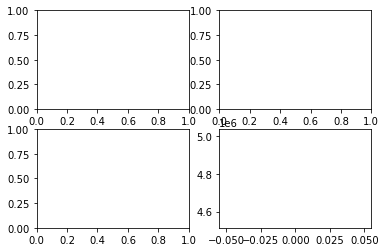

filtrage iteration = 0
filtrage iteration = 1
filtrage iteration = 2
filtrage iteration = 3
filtrage iteration = 4
filtrage iteration = 5
filtrage iteration = 6
filtrage iteration = 7
filtrage iteration = 8
filtrage iteration = 9
filtrage iteration = 10
filtrage iteration = 11
filtrage iteration = 12
filtrage iteration = 13
filtrage iteration = 14
filtrage iteration = 15
filtrage iteration = 16
filtrage iteration = 17
filtrage iteration = 18
filtrage iteration = 19
filtrage iteration = 20
filtrage iteration = 21
filtrage iteration = 22
filtrage iteration = 23
filtrage iteration = 24
filtrage iteration = 25
filtrage iteration = 26
filtrage iteration = 27
filtrage iteration = 28
filtrage iteration = 29
filtrage iteration = 30
filtrage iteration = 31
filtrage iteration = 32
filtrage iteration = 33
filtrage iteration = 34
filtrage iteration = 35
filtrage iteration = 36
filtrage iteration = 37
filtrage iteration = 38
filtrage iteration = 39
filtrage iteration = 40
filtrage iteration = 41
fi

filtrage iteration = 333
filtrage iteration = 334
filtrage iteration = 335
filtrage iteration = 336
filtrage iteration = 337
filtrage iteration = 338
filtrage iteration = 339
filtrage iteration = 340
filtrage iteration = 341
filtrage iteration = 342
filtrage iteration = 343
filtrage iteration = 344
filtrage iteration = 345
filtrage iteration = 346
filtrage iteration = 347
filtrage iteration = 348
filtrage iteration = 349
filtrage iteration = 350
filtrage iteration = 351
filtrage iteration = 352
filtrage iteration = 353
filtrage iteration = 354
filtrage iteration = 355
filtrage iteration = 356
filtrage iteration = 357
filtrage iteration = 358
filtrage iteration = 359
filtrage iteration = 360
filtrage iteration = 361
filtrage iteration = 362
filtrage iteration = 363
filtrage iteration = 364
filtrage iteration = 365
filtrage iteration = 366
filtrage iteration = 367
filtrage iteration = 368
filtrage iteration = 369
filtrage iteration = 370
filtrage iteration = 371
filtrage iteration = 372


In [4]:
for id_file in range(args.id_min, args.id_max):

    if args.gpu <= 0:
        import numpy as xp
    else: 
        import cupy as xp
        print("Use GPU " + str(args.gpu))
        #xp.cuda.Device(args.gpu).use()
    
    
    SAVE_PATH = os.path.join("./data/audio/out/",
                                 "{}_{}/alpha={}/".format(args.type,
                                                          args.n_speaker,
                                                          args.alpha))
    
    fileObject2 = open(('./data/audio/out/mixture_nfft={}-N={}-M={}.pkl').format(nfft, args.n_speaker, args.n_mic), 'rb')
    unpickler = pkl.Unpickler(fileObject2)
    mix_spec = unpickler.load().astype(np.complex64)
    fileObject2.close()
    
    mix_spec = xp.asarray(mix_spec[:,:,:700,:])
    
    Separater = Alpha_MNMF(alpha=args.alpha,
                                       n_basis=args.n_basis, n_source= args.n_speaker,
                                       nb_Theta=args.n_Th, seed=args.seed,
                                       xp=xp, acoustic_model='far',
                                       update_psi=False,
                                       oracle=args.oracle, init_parameter=False)
    Separater.load_spectrogram(mix_spec)
    Separater.file_id = id_file
    Separater.solve(n_iteration=args.n_iteration, save_likelihood=True,
                                save_parameter=False, save_wav=True,
                                save_path=SAVE_PATH,
                                interval_save_parameter=args.n_inter)